# Task 1: Sparsity and Robustness

Please add your solution to this task from the manual in the cells below.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x = np.array([1, 1, 1, 1, 6, 1])
z_initial = 5.0
alpha = 0.01  
lam = 0.01  
num_iters = 100  

# L2

In [32]:
def L2_Loss(x, z):
    loss = np.sum((x - z) ** 2)
    return loss

def L2_grad(x, z):
    return -2 * (x - z)

def L2_min(x, z):
    z_new = z
    l2_losses = []
    for i in range(num_iters):
        for reading in x:
            grad = L2_grad(reading, z_new)
            z_new -= alpha * grad
        l2_losses.append(L2_Loss(x, z_new))
    return z_new, l2_losses

In [33]:
z_l2, l2_losses = L2_min(x, z_initial)
print(f"z value for L2 loss: {z_l2}")
print(f"Loss value: {L2_Loss(x,z_l2)}")

z value for L2 loss: 1.8584792841729645
Loss value: 20.837127246395113


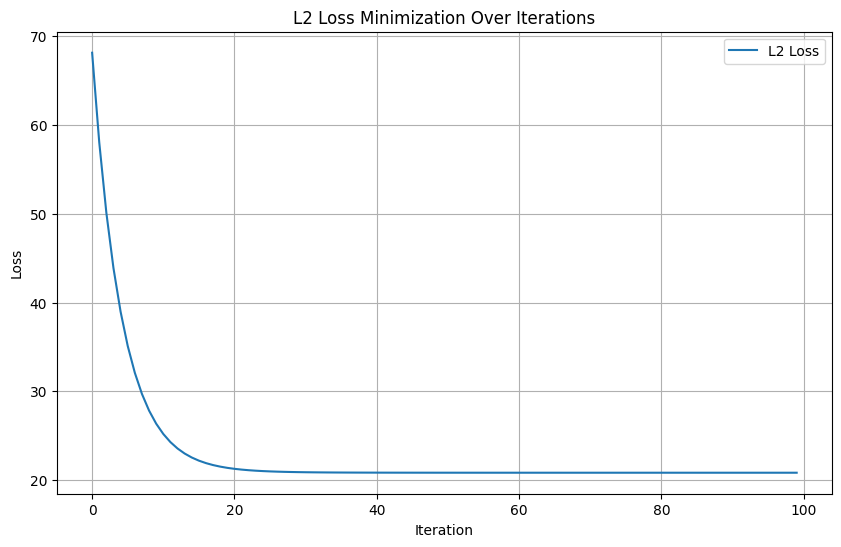

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_iters), l2_losses, label='L2 Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('L2 Loss Minimization Over Iterations')
plt.grid(True)
plt.legend()
plt.savefig('/kaggle/working/L2_Loss_Minimization.png', dpi=300)
plt.show()

# L1

In [35]:
def L1_minimizer(x, z_initial, lam=0.01, num_iters=100):
    z_new = z_initial
    l1_losses = []

    for i in range(num_iters):
        median_x = np.median(x)
        
        if z_new < median_x:
            z_new += lam
        elif z_new > median_x:
            z_new -= lam
        
        l1_losses.append(L1_Loss(x, z_new))
        
        if (i + 1) % 10 == 0:
            print(f'Iteration {i + 1} - z: {z_new}, Loss: {l1_losses[-1]}')

    return z_new, l1_losses

In [36]:
z_l1, l1_losses = L1_minimizer(x, z_initial)

print(f"z value for L1 loss: {z_l1}")
print(f"Loss value: {L1_Loss(x,z_l1)}")

Iteration 10 - z: 4.900000000000002, Loss: 20.60000000000001
Iteration 20 - z: 4.800000000000004, Loss: 20.200000000000017
Iteration 30 - z: 4.700000000000006, Loss: 19.800000000000026
Iteration 40 - z: 4.6000000000000085, Loss: 19.400000000000034
Iteration 50 - z: 4.500000000000011, Loss: 19.000000000000043
Iteration 60 - z: 4.400000000000013, Loss: 18.60000000000005
Iteration 70 - z: 4.300000000000015, Loss: 18.20000000000006
Iteration 80 - z: 4.200000000000017, Loss: 17.800000000000068
Iteration 90 - z: 4.100000000000019, Loss: 17.400000000000077
Iteration 100 - z: 4.000000000000021, Loss: 17.000000000000085
z value for L1 loss: 4.000000000000021
Loss value: 17.000000000000085


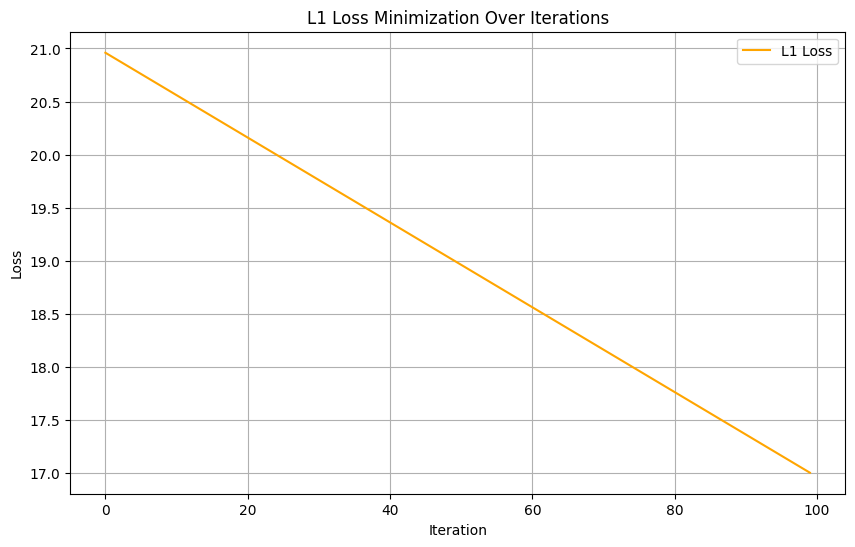

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_iters), l1_losses, label='L1 Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('L1 Loss Minimization Over Iterations')
plt.grid(True)
plt.legend()
plt.savefig('/kaggle/working/L1_Loss_Minimization.png', dpi=300)
plt.show()

# L0

In [38]:
def L0_Loss(x,z):
    return np.sum((x - z) != 0)

def L0_minimizer(x):
  values, counts = np.unique(x, return_counts=True)
  max_idx = np.argmax(counts)
  z_new = values[max_idx]
  return z_new

In [39]:
z_l0=L0_minimizer(x)

print(f"z value for L0 loss: {z_l0}")
print(f"Loss value: {L0_Loss(x,z_l0)}")

z value for L0 loss: 1
Loss value: 1


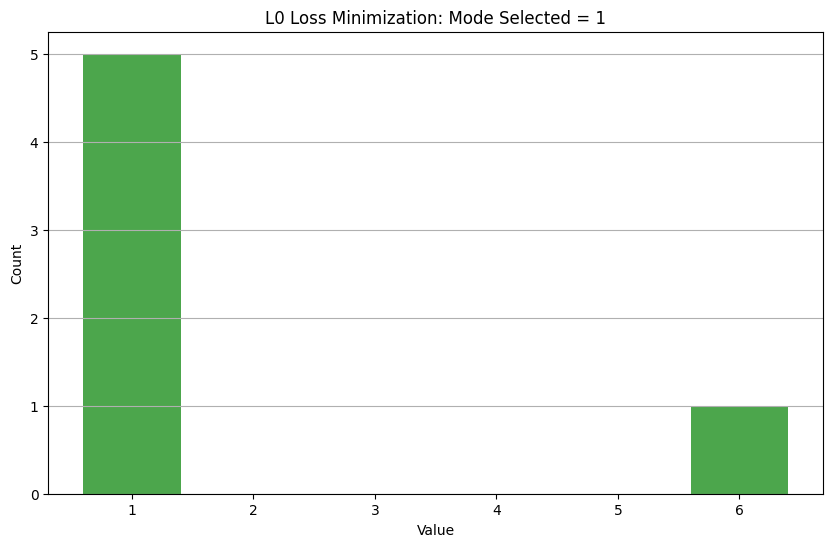

In [40]:
values, counts = np.unique(x, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(values, counts, color='green', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title(f'L0 Loss Minimization: Mode Selected = {z_l0}')
plt.grid(axis='y')
plt.savefig('/kaggle/working/L0_Loss_Minimization.png', dpi=300)
plt.show()

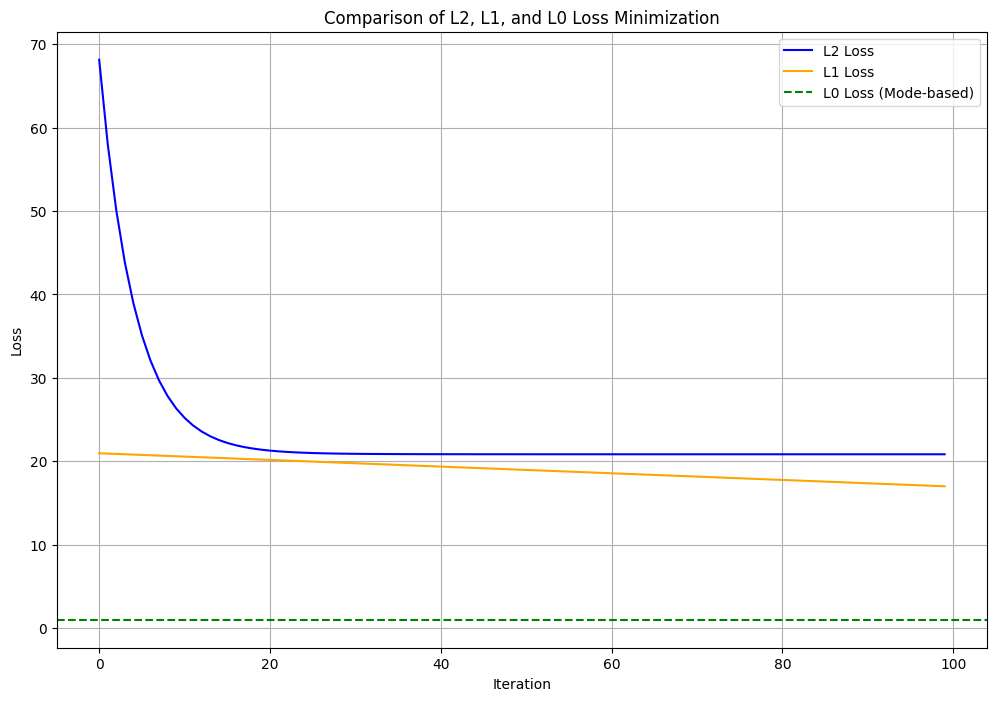

In [41]:
plt.figure(figsize=(12, 8))

plt.plot(range(num_iters), l2_losses, label='L2 Loss', color='blue')

plt.plot(range(num_iters), l1_losses, label='L1 Loss', color='orange')

l0_loss = L0_Loss(x, z_l0)
plt.axhline(y=l0_loss, color='green', linestyle='--', label='L0 Loss (Mode-based)')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Comparison of L2, L1, and L0 Loss Minimization')
plt.legend()
plt.grid(True)
plt.savefig('/kaggle/working/Comparison_Loss_Minimization.png', dpi=300)
plt.show()

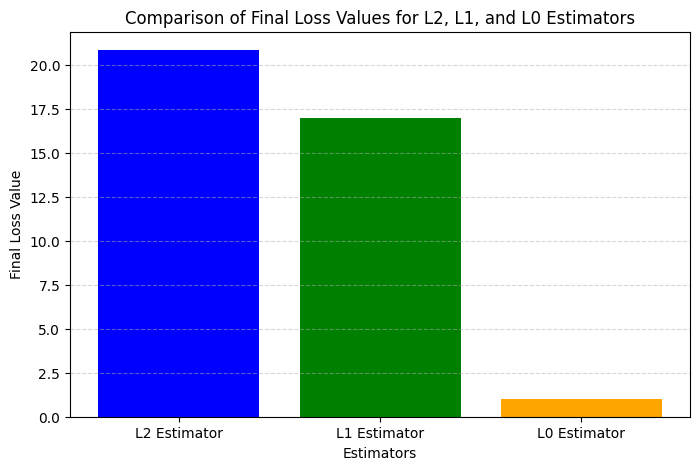

In [42]:
l2_final_loss = L2_Loss(x, z_l2)
l1_final_loss = L1_Loss(x, z_l1)
l0_final_loss = L0_Loss(x, z_l0)

estimators = ['L2 Estimator', 'L1 Estimator', 'L0 Estimator']
final_losses = [l2_final_loss, l1_final_loss, l0_final_loss]

plt.figure(figsize=(8, 5))
plt.bar(estimators, final_losses, color=['blue', 'green', 'orange'])
plt.xlabel('Estimators')
plt.ylabel('Final Loss Value')
plt.title('Comparison of Final Loss Values for L2, L1, and L0 Estimators')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig('/kaggle/working/final_loss_comparison.png', format='png')
plt.show()